In [9]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as mtp
import seaborn as sns
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn import metrics

In [24]:
calories = pd.read_excel('calories.csv.xlsx')
calories.head()

,User_ID,Calories
0,14733363,231
1,14861698,66
2,11179863,26
3,16180408,71
4,17771927,35


In [26]:
exercise = pd.read_excel('exercise.csv.xlsx')
exercise.head()


,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,14733363,male,68,190,94,29,105,40.8
1,14861698,female,20,166,60,14,94,40.3
2,11179863,male,69,179,79,5,88,38.7
3,16180408,female,34,179,71,13,100,40.5
4,17771927,female,27,154,58,10,81,39.8


In [28]:
calories_data = pd.concat([exercise,calories['Calories']],axis=1)
calories_data.head()
                          

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,male,68,190,94,29,105,40.8,231
1,14861698,female,20,166,60,14,94,40.3,66
2,11179863,male,69,179,79,5,88,38.7,26
3,16180408,female,34,179,71,13,100,40.5,71
4,17771927,female,27,154,58,10,81,39.8,35


In [30]:
calories_data.shape #checking rows and columns

(15000, 9)

In [34]:
#to check if there is any missing value in any of the columns
calories_data.isnull().sum()

User_ID       0
Gender        0
Age           0
Height        0
Weight        0
Duration      0
Heart_Rate    0
Body_Temp     0
Calories      0
dtype: int64

In [35]:
calories_data.describe()

,User_ID,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
count,1.500000e+04,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,1.497736e+07,42.789800,174.465133,74.966867,15.530600,95.518533,40.025453,89.539533
std,2.872851e+06,16.980264,14.258114,15.035657,8.319203,9.583328,0.779230,62.456978
min,1.000116e+07,20.000000,123.000000,36.000000,1.000000,67.000000,37.100000,1.000000
25%,1.247419e+07,28.000000,164.000000,63.000000,8.000000,88.000000,39.600000,35.000000
50%,1.499728e+07,39.000000,175.000000,74.000000,16.000000,96.000000,40.200000,79.000000
75%,1.744928e+07,56.000000,185.000000,87.000000,23.000000,103.000000,40.600000,138.000000
max,1.999965e+07,79.000000,222.000000,132.000000,30.000000,128.000000,41.500000,314.000000


In [43]:
sns.set()

<Axes: xlabel='count', ylabel='Gender'>

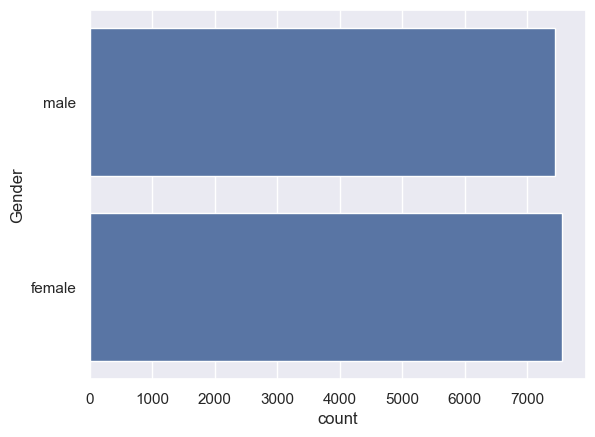

In [42]:
sns.countplot(calories_data['Gender'])

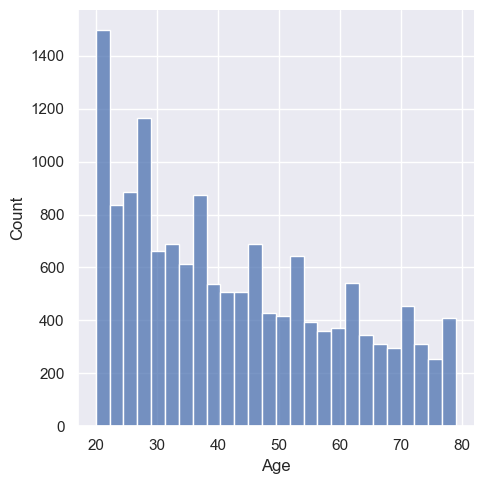

In [48]:
sns.displot(calories_data['Age'])

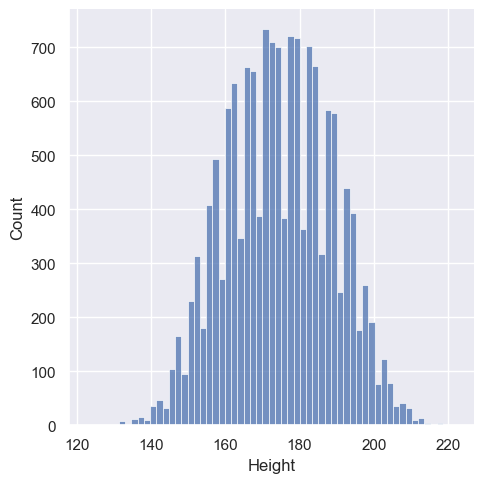

In [49]:
sns.displot(calories_data['Height'])

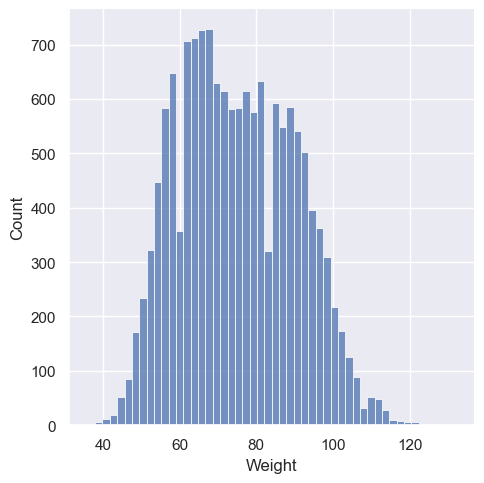

In [50]:
sns.displot(calories_data['Weight'])

In [59]:
correlation = calories_data.corr(numeric_only=True)



<Axes: >

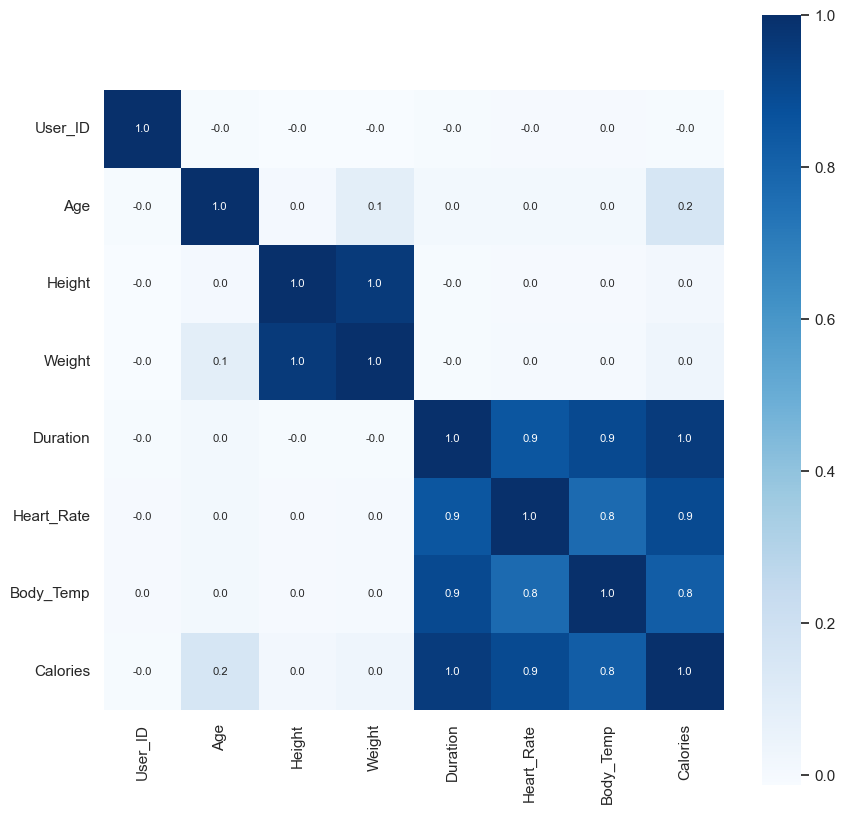

In [63]:
mtp.figure(figsize=(10,10))
sns.heatmap(correlation,cbar=True,square=True,fmt='.1f',annot=True,annot_kws={'size': 8},cmap='Blues')

In [66]:
calories_data['Gender'] = calories_data['Gender'].map({'male': 0, 'female': 1})


In [68]:
X = calories_data.drop(columns=['User_ID','Calories'],axis=1)
Y = calories_data['Calories']
print(X)


       Gender  Age  Height  Weight  Duration  Heart_Rate  Body_Temp
0         NaN   68     190      94        29         105       40.8
1         NaN   20     166      60        14          94       40.3
2         NaN   69     179      79         5          88       38.7
3         NaN   34     179      71        13         100       40.5
4         NaN   27     154      58        10          81       39.8
...       ...  ...     ...     ...       ...         ...        ...
14995     NaN   20     193      86        11          92       40.4
14996     NaN   27     165      65         6          85       39.2
14997     NaN   43     159      58        16          90       40.1
14998     NaN   78     193      97         2          84       38.3
14999     NaN   63     173      79        18          92       40.5

[15000 rows x 7 columns]


In [69]:
print(Y)

0        231
1         66
2         26
3         71
4         35
        ... 
14995     45
14996     23
14997     75
14998     11
14999     98
Name: Calories, Length: 15000, dtype: int64


In [71]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2,random_state = 2)
print(X.shape,X_train.shape,X_test.shape)

(15000, 7) (12000, 7) (3000, 7)


In [72]:
#XGBoost Regressor
model = XGBRegressor()
model.fit(X_train,Y_train)

,objective,'reg:squarederror'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,None


In [73]:
test_data_prediction = model.predict(X_test)
print(test_data_prediction)

[127.66284  217.11703   36.980682 ... 146.00682   23.630262  90.783676]


In [77]:
#mean absolute error
mae = metrics.mean_absolute_error(Y_test , test_data_prediction)
print("Mean Absolute Error : ",mae)

Mean Absolute Error :  2.4296069145202637
